In [11]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from google.colab import files
import zipfile


In [7]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from google.colab import files
import zipfile

# Step 2: Upload the .zip file containing images
uploaded = files.upload()  # This will open a file selector to upload your .zip file
print(uploaded.keys())

# Step 3: Unzip the uploaded file
zip_file_path = 'test.zip'  # Replace with the name of your uploaded .zip file
output_folder = 'output'  # Name of the folder where images will be extracted

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print("Files have been extracted to:", output_folder)

Saving test.zip to test (2).zip
dict_keys(['test (2).zip'])
Files have been extracted to: output


Processing 2024ny.jpg
Saved shaken image as shaken_2024ny.jpg


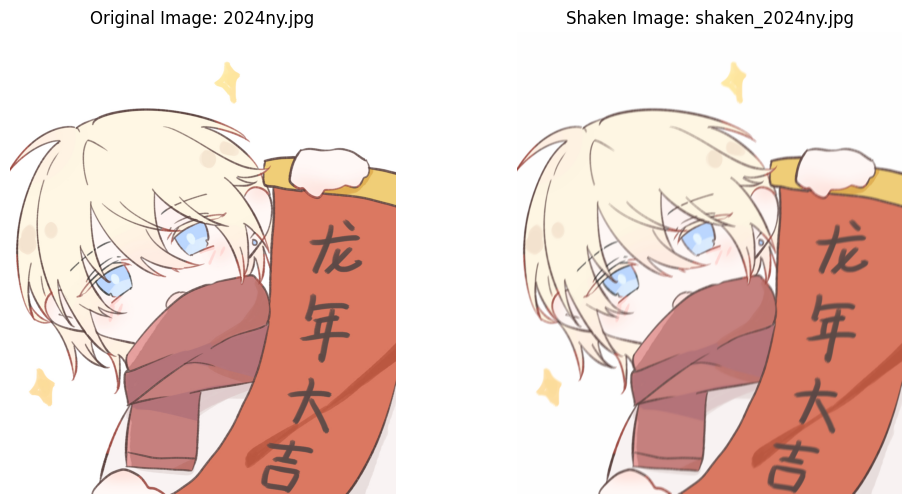

Processing Illustration76_2.jpg
Saved shaken image as shaken_Illustration76_2.jpg


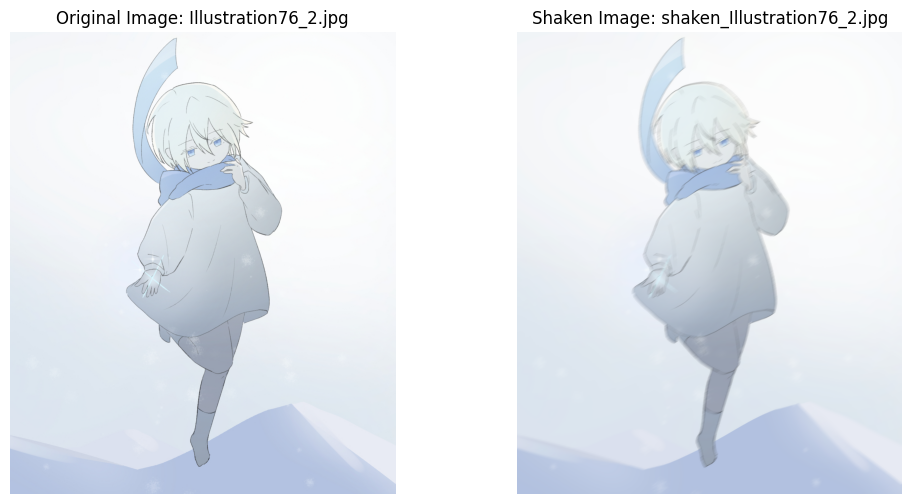

All images have been processed!
updating: shaken_photos/ (stored 0%)
updating: shaken_photos/2024ny.jpg (deflated 10%)
updating: shaken_photos/Illustration76_2.jpg (deflated 6%)
updating: shaken_photos/shaken_Illustration76_2.jpg (deflated 7%)
updating: shaken_photos/shaken_2024ny.jpg (deflated 10%)


In [14]:

# Step 4: Prepare output folder for processed images
output_folder_processed = 'shaken_photos'
if not os.path.exists(output_folder_processed):
    os.makedirs(output_folder_processed)

# Function to apply motion blur to an image
def apply_motion_blur(image, kernel_size=15, angle=45):
    # Create a kernel with a line (motion direction)
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = cv2.warpAffine(
        kernel,
        cv2.getRotationMatrix2D((kernel_size / 2 - 0.5, kernel_size / 2 - 0.5), angle, 1),
        (kernel_size, kernel_size)
    )
    kernel = kernel / kernel_size
    # Apply the kernel to the image
    return cv2.filter2D(image, -1, kernel)

# Step 5: Process each image to apply the motion blur effect
for root, dirs, files in os.walk(output_folder):
    for image_file in files:
        if image_file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, image_file)
            img = cv2.imread(img_path)

            if img is not None:
                print(f"Processing {image_file}")

                # Randomly choose kernel size and angle for a varied shake effect
                kernel_size = random.randint(10, 20)  # Adjust for desired blur intensity
                angle = random.randint(0, 360)  # Random angle for more natural shake

                # Apply motion blur
                blurred_img = apply_motion_blur(img, kernel_size=kernel_size, angle=angle)

                # Save the processed image with a different name to confirm it is processed
                processed_filename = f"shaken_{image_file}"
                output_path = os.path.join(output_folder_processed, processed_filename)
                success = cv2.imwrite(output_path, blurred_img)

                if success:
                    print(f"Saved shaken image as {processed_filename}")
                else:
                    print(f"Failed to save {processed_filename}")

                # Display original and blurred images side by side for verification
                plt.figure(figsize=(12, 6))
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"Original Image: {image_file}")
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
                plt.title(f"Shaken Image: {processed_filename}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Failed to read {image_file}")

print("All images have been processed!")

# Step 6: Zip the processed images folder for download
output_zip = 'shaken_photos.zip'
!zip -r $output_zip $output_folder_processed